In [1]:
#importing basic libraries to read dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1.Exploratory Data Analysis (EDA):**

In [2]:
df_glass=pd.read_excel('glass.xlsx', sheet_name='glass')
df_glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
#checking for the no.of rows and columns in dataset
df_glass.shape

(214, 10)

In [4]:
#finding the more info about dataset
df_glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
#To know more drscription about the dataset
df_glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
#checking for the null or missing values in dataset
df_glass.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [7]:
#checking for the duplicated rows or columns in dataset
df_glass.duplicated().sum()

np.int64(1)

In [8]:
#droping the duplicated values for dataset
df_glass.drop_duplicates(inplace=True)

In [9]:
import numpy as np

def find_and_drop_outliers_iqr(df_glass):
   df_cleaned = df_glass.copy()  # Create a copy to avoid modifying the original DataFrame
   for col in df_cleaned.select_dtypes(include=np.number):
       Q1 = np.percentile(df_cleaned[col], 25)
       Q3 = np.percentile(df_cleaned[col], 75)
       IQR = Q3 - Q1
       lower_bound = Q1 - 1.5 * IQR
       upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
       outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]

    # Drop outliers (remove rows with outliers)
       df_cleaned = df_cleaned[~df_cleaned.index.isin(outliers.index)]
   return df_cleaned

# Call the function to find and drop outliers
df_cleaned_no_outliers = find_and_drop_outliers_iqr(df_glass)
print("Data frame with outliers:", df_glass.shape)
print("Data frame without outliers:", df_cleaned_no_outliers.shape)

Data frame with outliers: (213, 10)
Data frame without outliers: (104, 10)


**2:Data Visualization:**

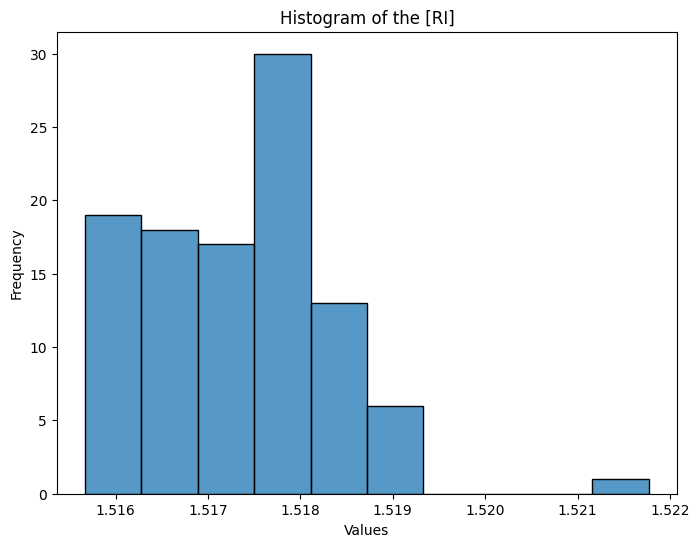

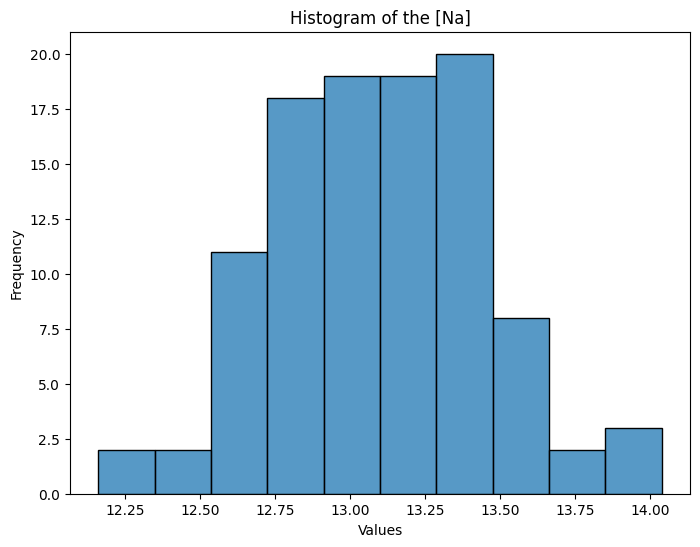

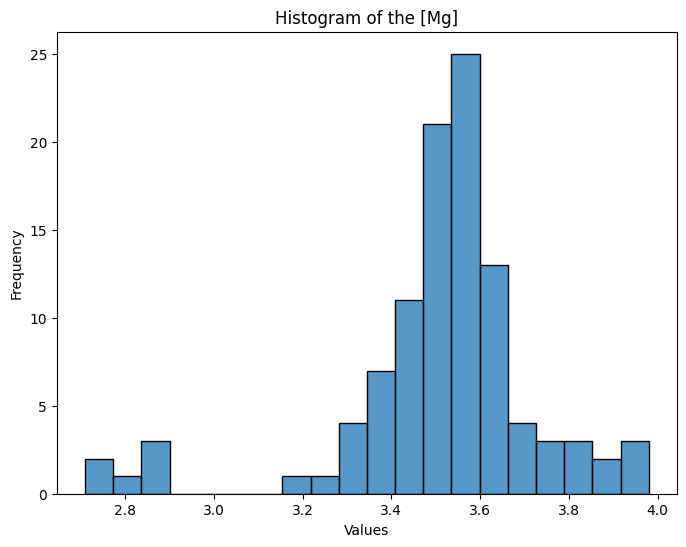

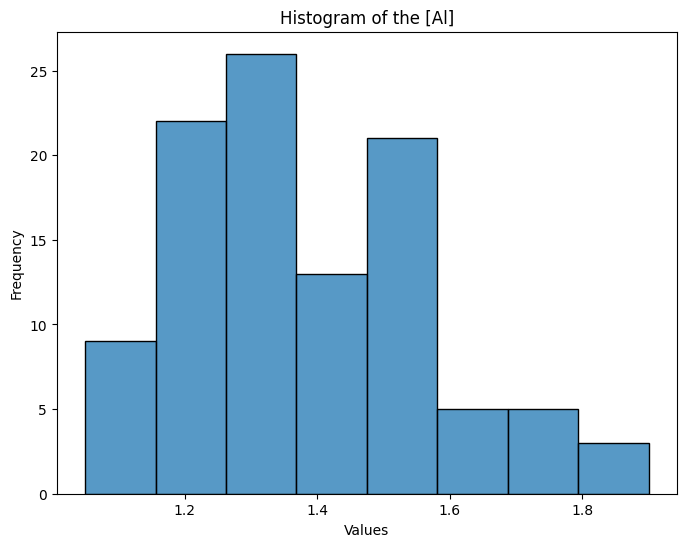

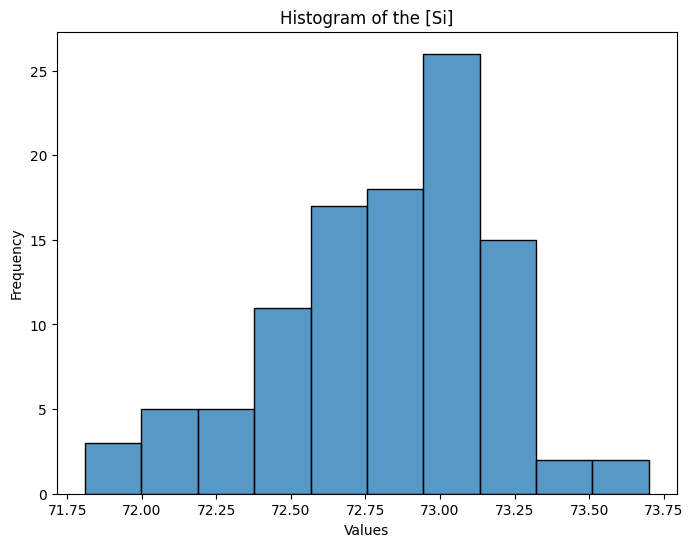

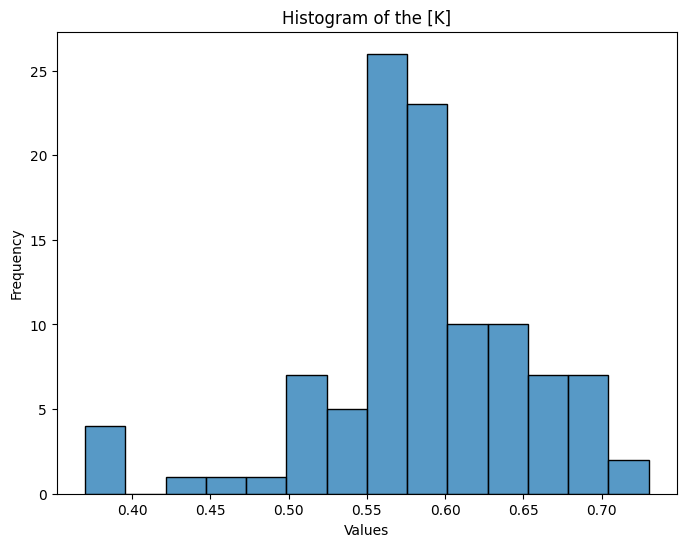

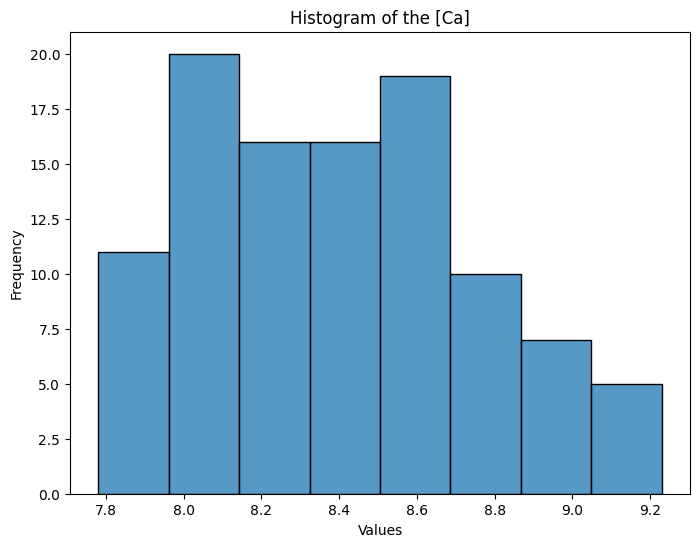

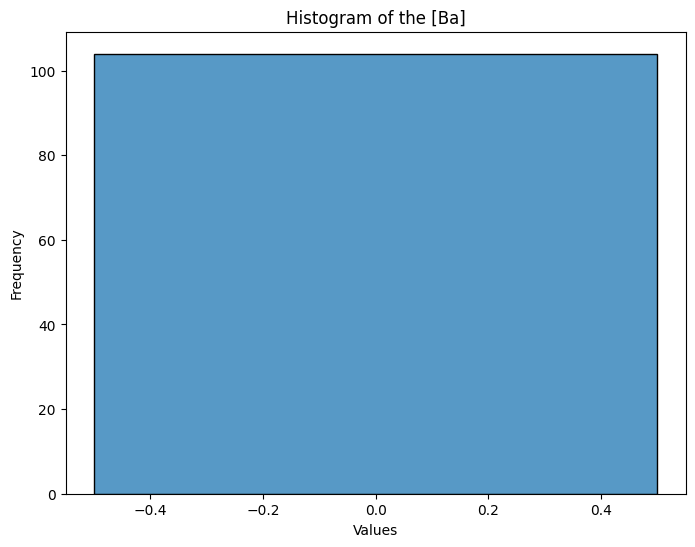

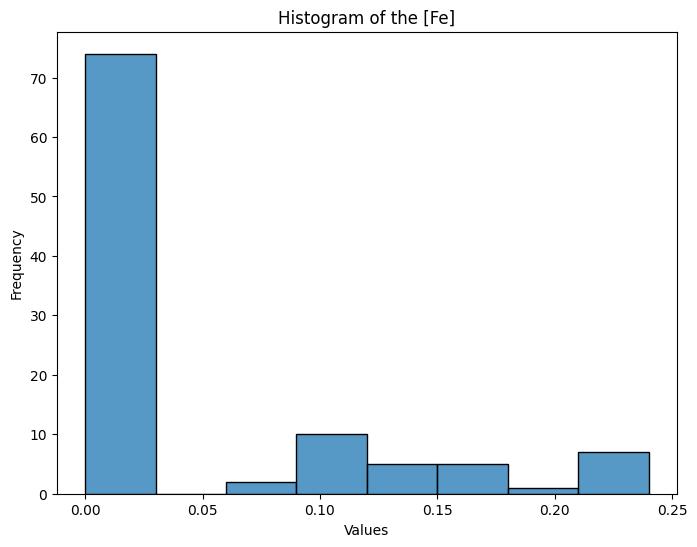

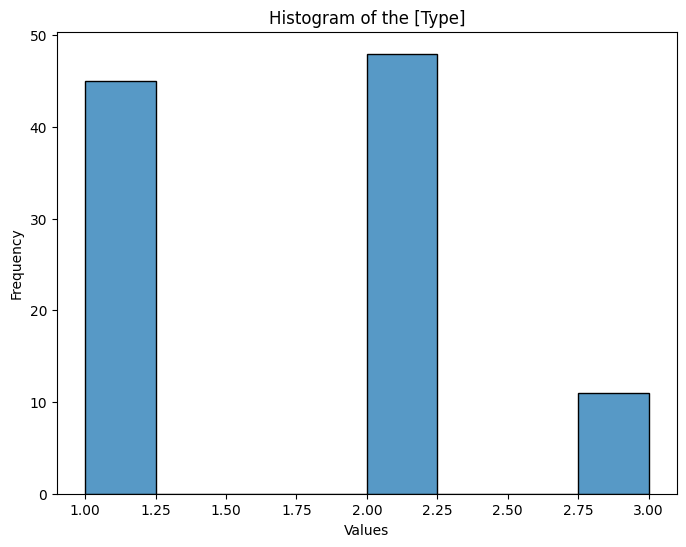

In [10]:
#Visulizing the histogram and box plot for each column
for col in df_cleaned_no_outliers:
 plt.figure(figsize=(8,6))
 plt.title('Histogram of the [' + col + ']')
 plt.xlabel("Values")
 plt.ylabel("Frequency")
 sns.histplot(df_cleaned_no_outliers[col])
 plt.show()

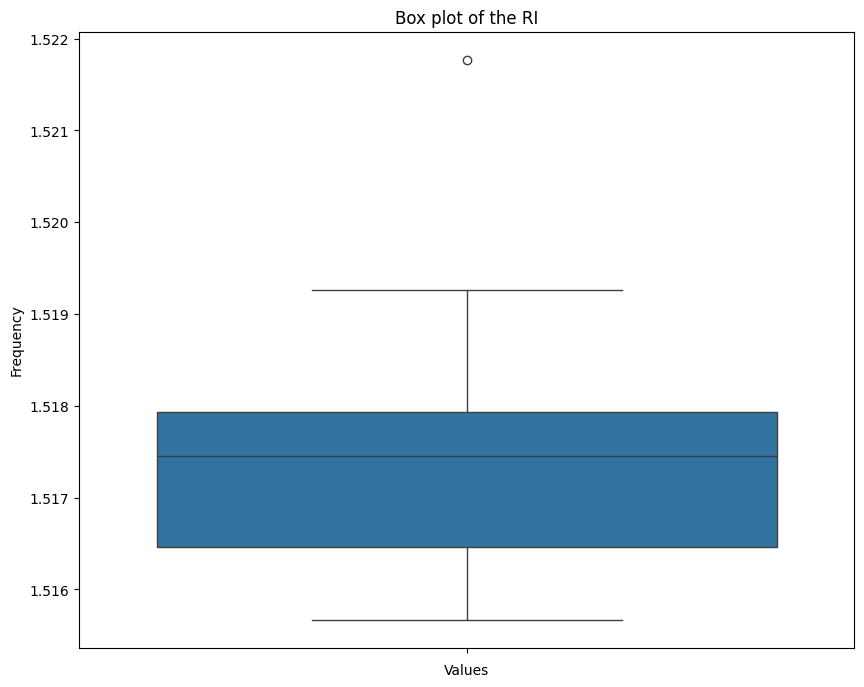

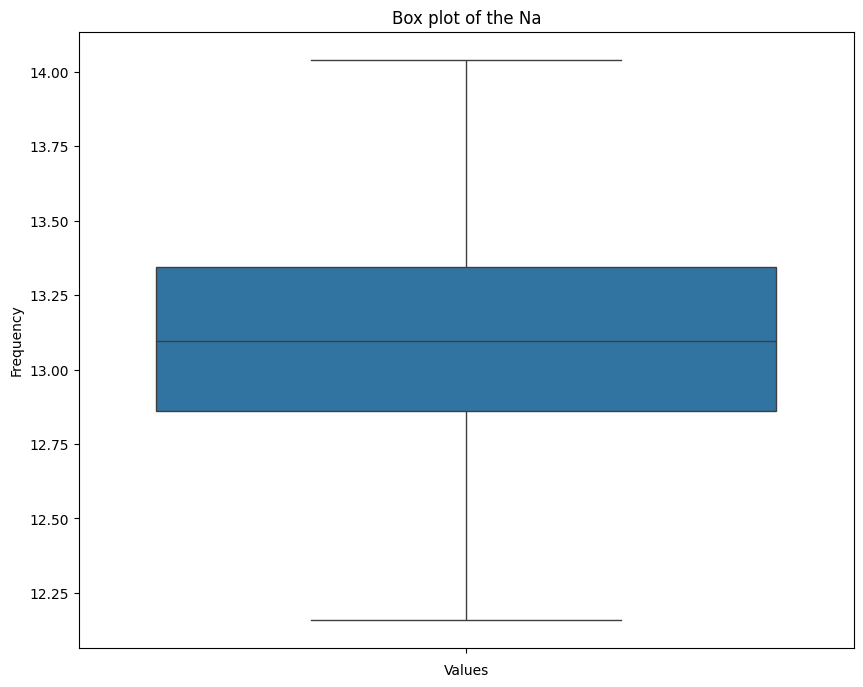

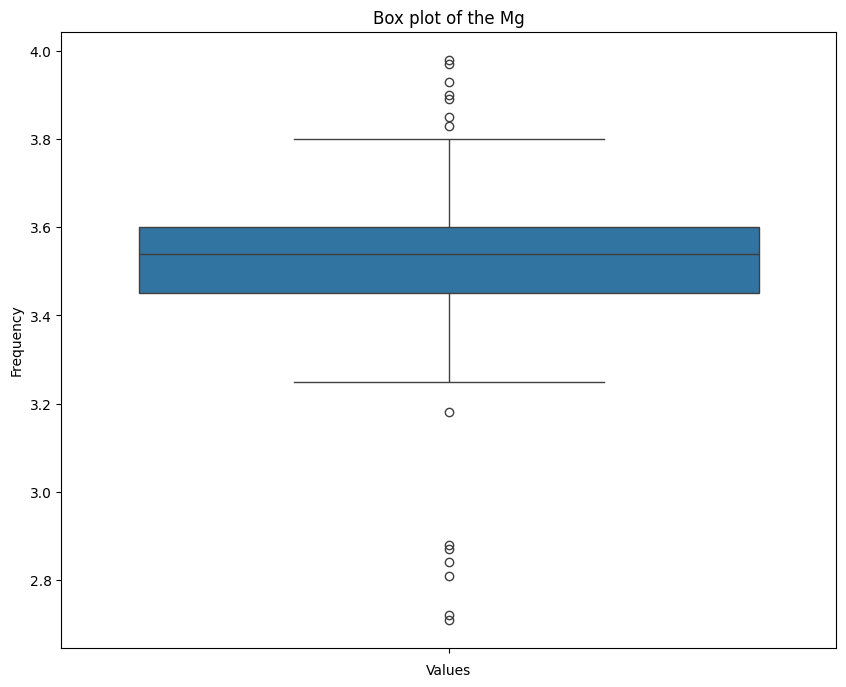

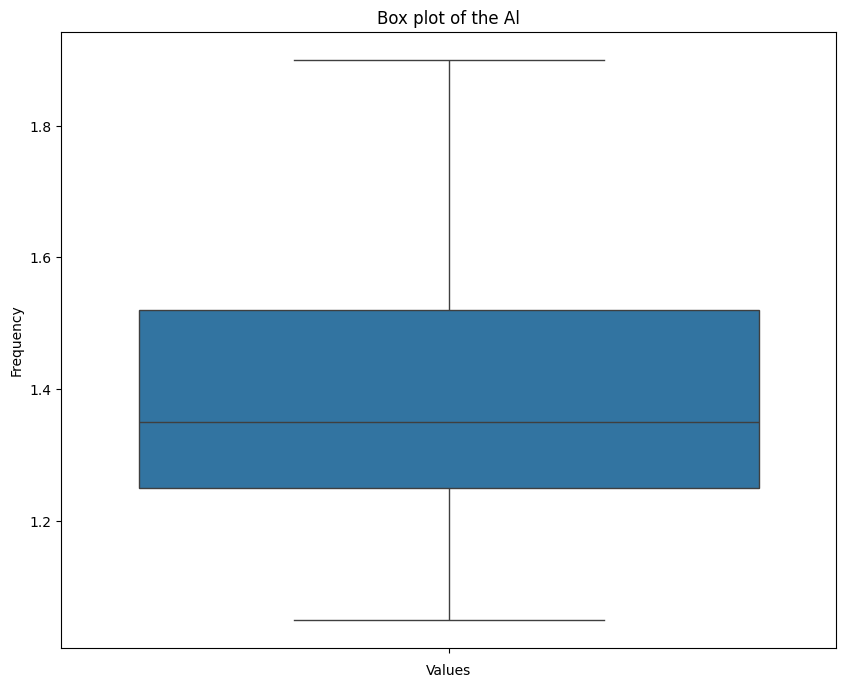

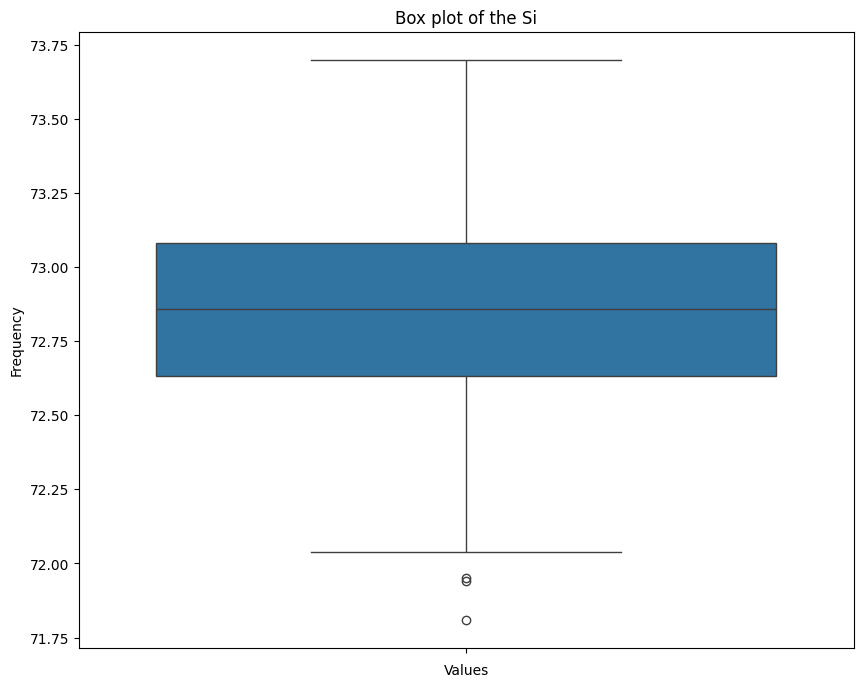

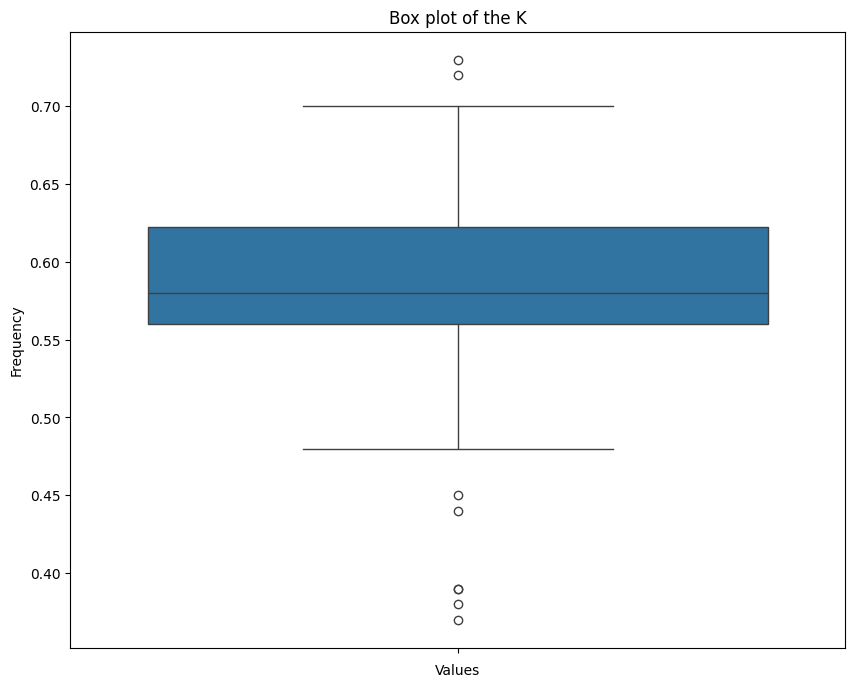

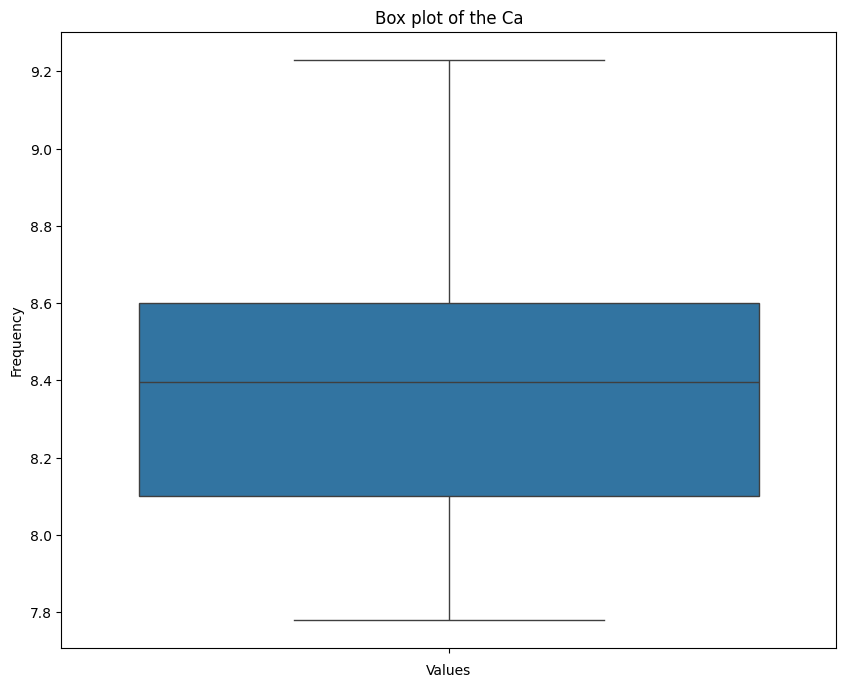

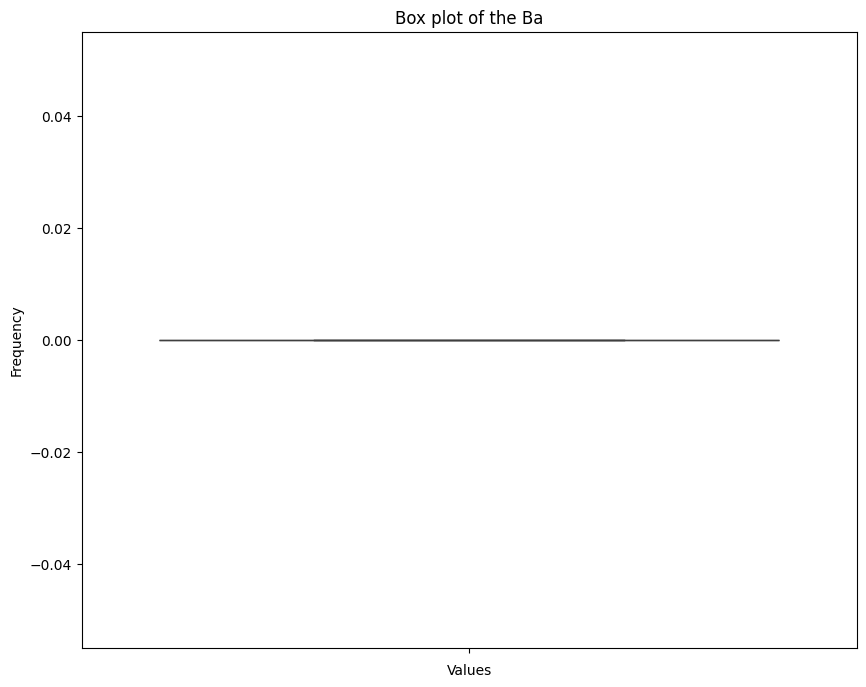

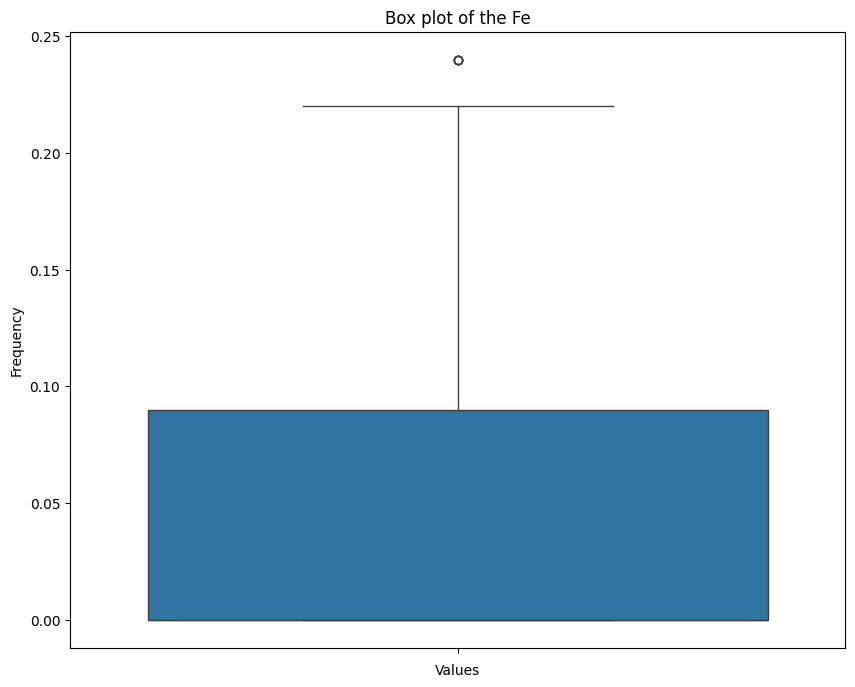

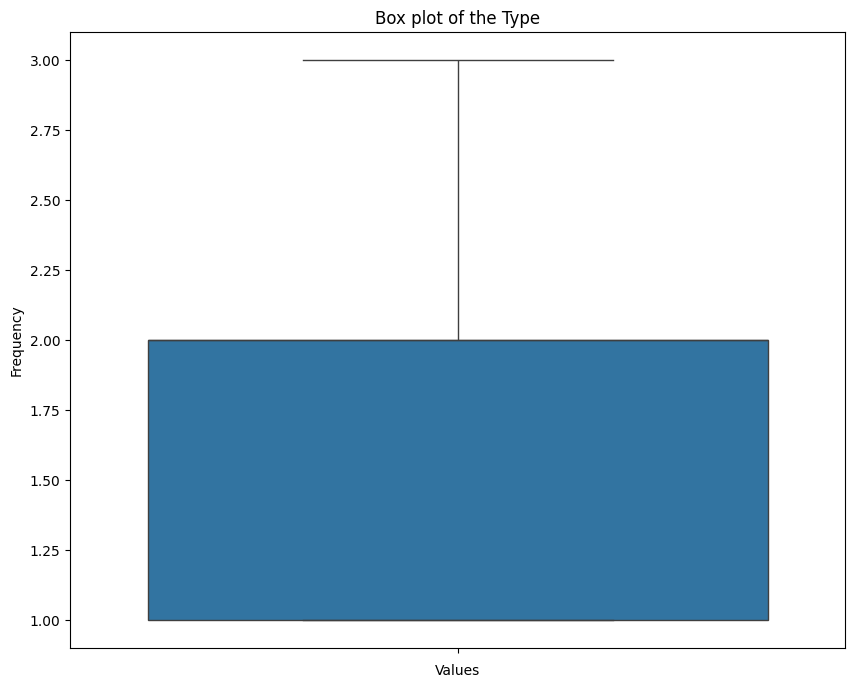

In [11]:
#visulizing the Box plot for given dataset
for col in df_cleaned_no_outliers:
  plt.figure(figsize=(10,8))
  plt.title('Box plot of the '+ col)
  plt.xlabel("Values")
  plt.ylabel("Frequency")
  sns.boxplot(df_cleaned_no_outliers[col])
  plt.show()


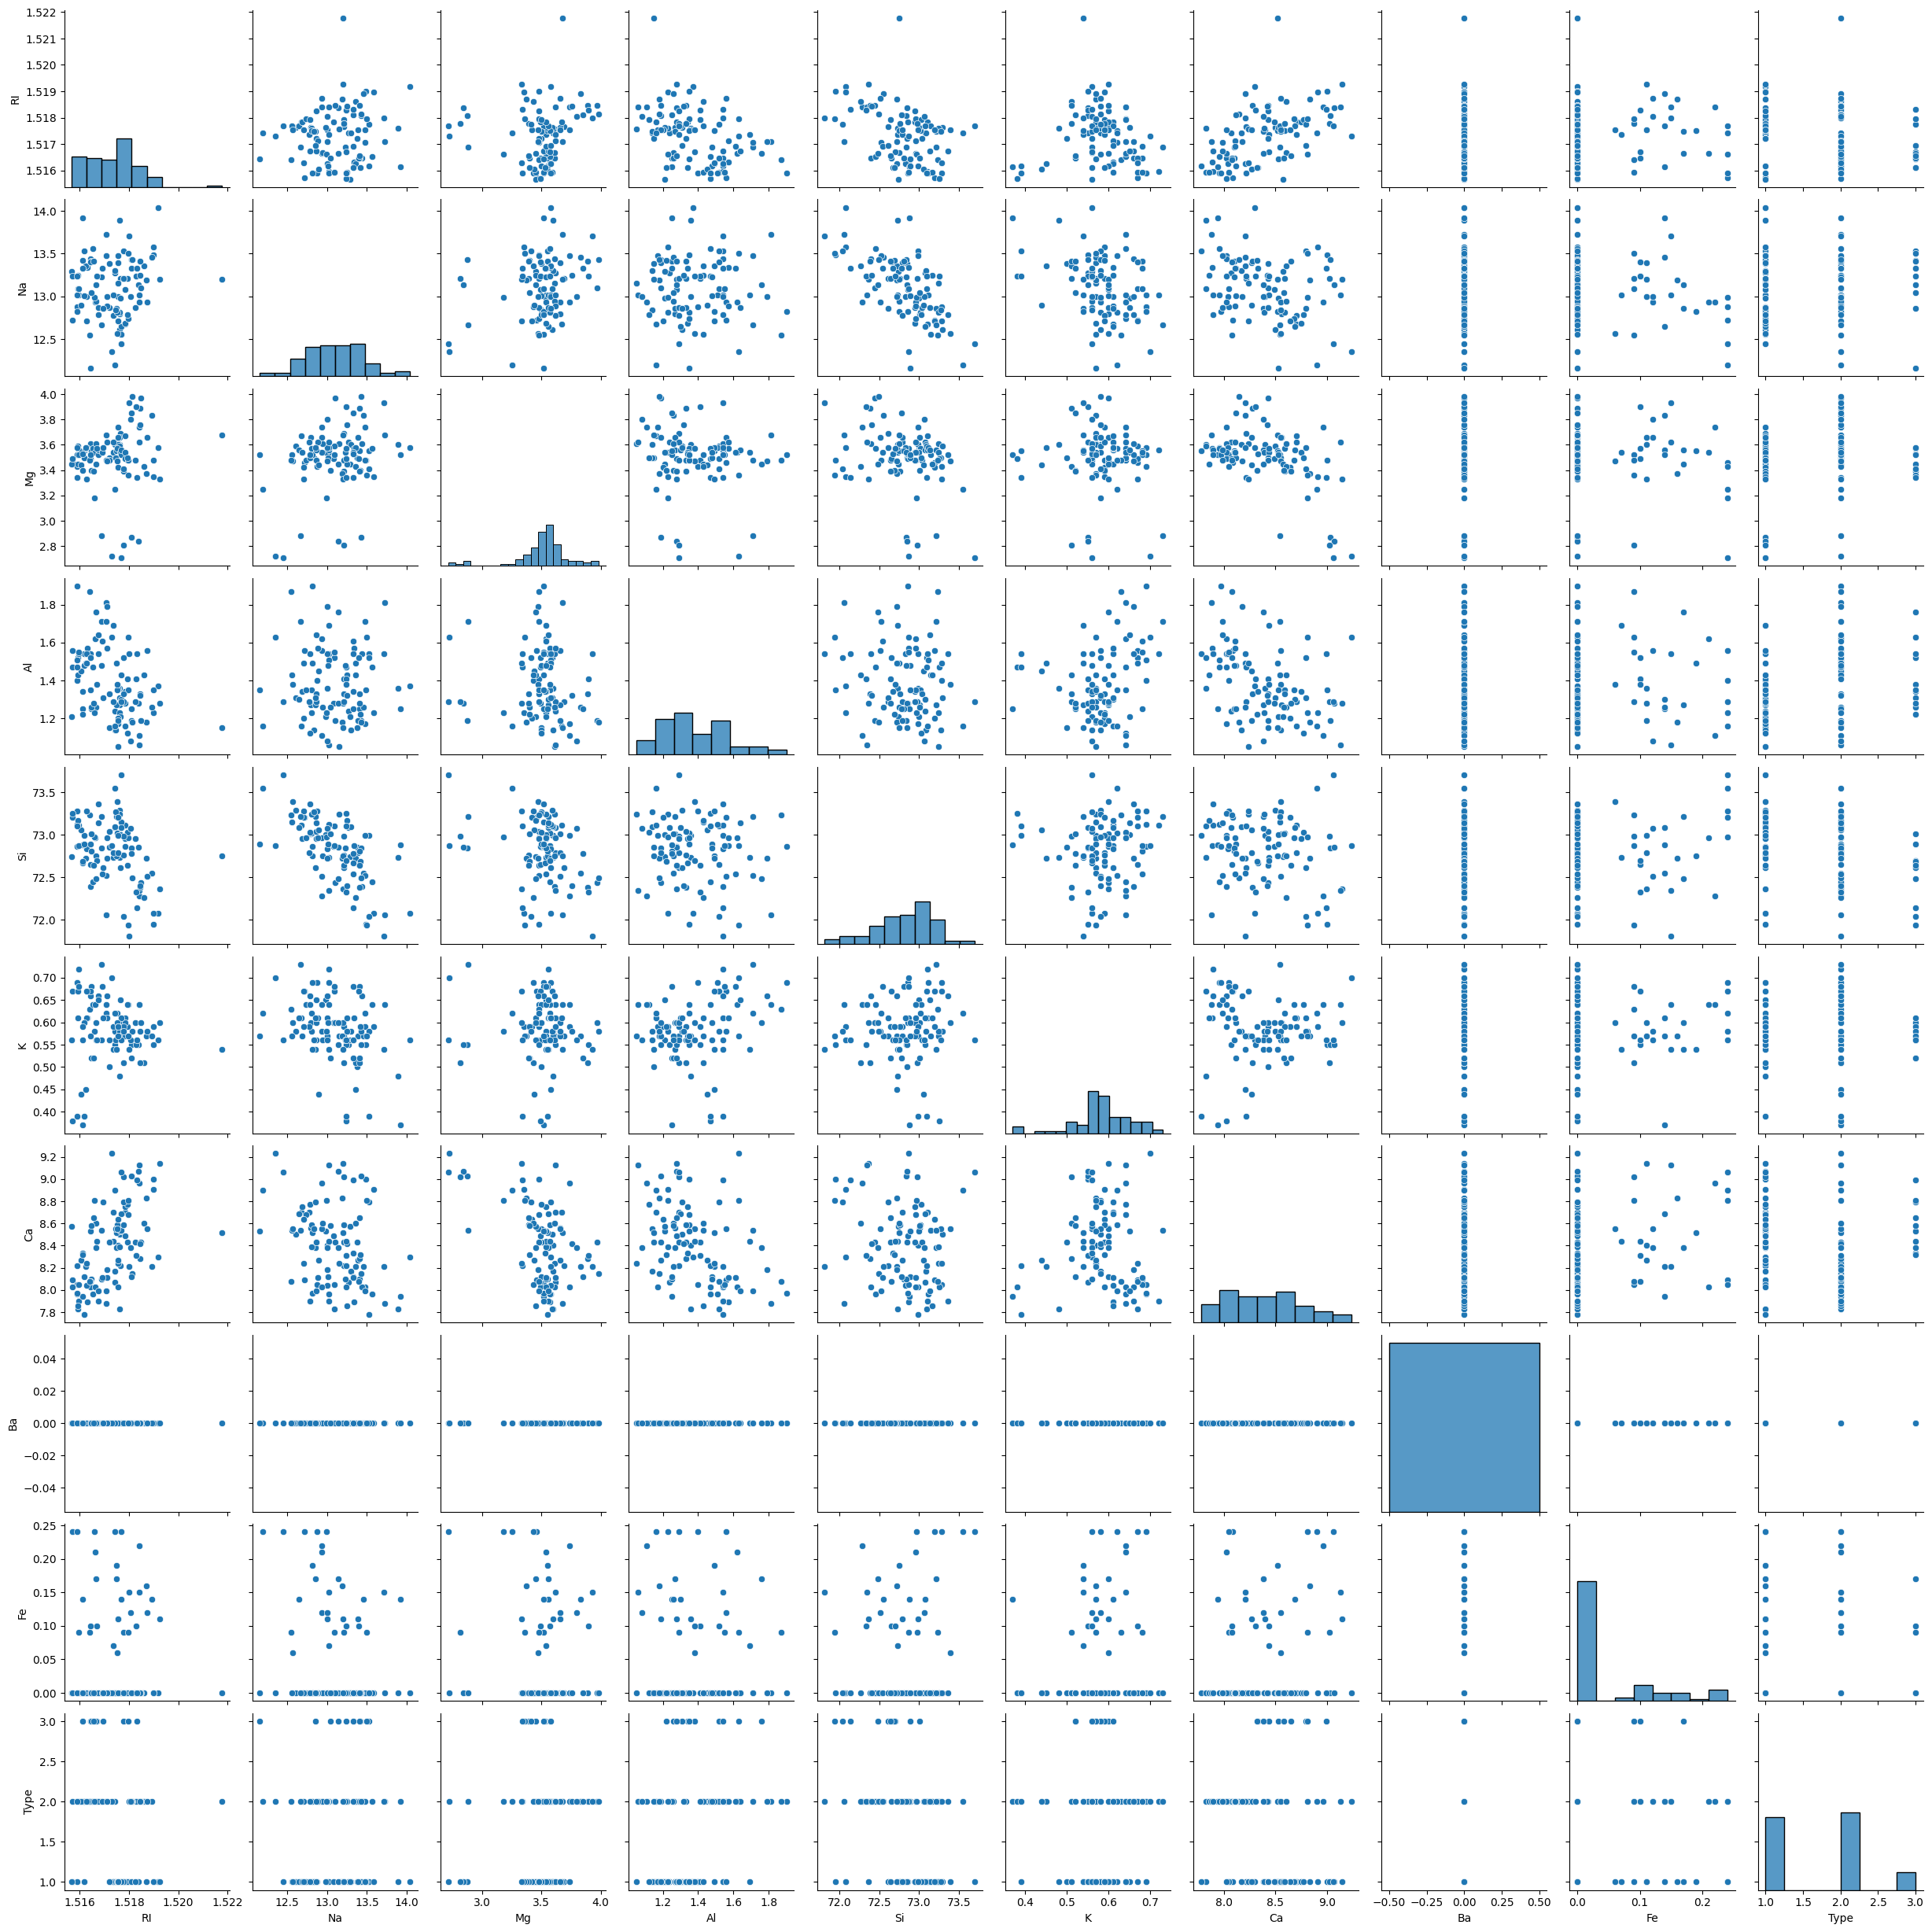

In [12]:
#Visulizing the pair plot for given dataset
sns.pairplot(df_cleaned_no_outliers)
plt.show()

In [13]:
#finding the coreleation between the dataset
df_cleaned_no_outliers.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,0.112558,0.119473,-0.411694,-0.389915,-0.101900,0.527862,NaN,0.030877,-0.283903
Na,0.112558,1.000000,0.252616,-0.014180,-0.642772,-0.359758,-0.307472,NaN,-0.183155,0.131456
Mg,0.119473,0.252616,1.000000,-0.112102,-0.282293,-0.060664,-0.483946,NaN,-0.093993,0.080182
Al,-0.411694,-0.014180,-0.112102,1.000000,-0.124871,0.264455,-0.409398,NaN,-0.039480,0.341190
Si,-0.389915,-0.642772,-0.282293,-0.124871,1.000000,0.072888,-0.154089,NaN,0.071728,-0.320673
K,-0.101900,-0.359758,-0.060664,0.264455,0.072888,1.000000,-0.036310,NaN,0.052779,0.049001
Ca,0.527862,-0.307472,-0.483946,-0.409398,-0.154089,-0.036310,1.000000,NaN,0.180093,-0.134659
Ba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fe,0.030877,-0.183155,-0.093993,-0.039480,0.071728,0.052779,0.180093,NaN,1.000000,-0.026387
Type,-0.283903,0.131456,0.080182,0.341190,-0.320673,0.049001,-0.134659,NaN,-0.026387,1.000000


**3:Data Preprocessing**

1.There are no missing values in dataset to perform any techniques to treate missing values(like:imputation,removal of null values).

2.There is no catagorical columns in the give dataset,so there is no requriment of the Encoding or one-hot encoding technique.

3.There are no large values in the dataset,so there is no requriment of the Standardisation or Normilisation technique.

**4:Random Forest Model Implementation**

In [14]:
#Dividing the dataset into training and testing dataset
from sklearn.model_selection import train_test_split

# Assuming 'df_glass' is your DataFrame and 'Type' is the target variable
X = df_cleaned_no_outliers.drop('Type', axis=1)  # Features
y = df_cleaned_no_outliers['Type']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a Random Forest classifier object
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # For multi-class classification
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7619047619047619
Precision: 0.7857142857142857
Recall: 0.7619047619047619
F1-score: 0.7481203007518796


**5:Bagging and Boosting Methods:**

In [16]:
from sklearn.ensemble import BaggingClassifier
bagging_classifier = BaggingClassifier(estimator=RandomForestClassifier(),
                                      n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred_bagging = bagging_classifier.predict(X_test)

# Evaluate the model's performance (similar to how you evaluated Random Forest)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)  # Calculate accuracy and assign to variable
print("Accuracy (Bagging):", accuracy_bagging)  # Print the value of the variable

precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
print("Precision (Bagging):", precision_bagging)

recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
print("Recall (Bagging):", recall_bagging)

f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')
print("F1-score (Bagging):", f1_bagging)

Accuracy (Bagging): 0.7142857142857143
Precision (Bagging): 0.6116883116883117
Recall (Bagging): 0.7142857142857143
F1-score (Bagging): 0.6586466165413534


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
from sklearn.ensemble import AdaBoostClassifier
boosting_classifier = AdaBoostClassifier(estimator=RandomForestClassifier(),
                                         n_estimators=50, random_state=42)
boosting_classifier.fit(X_train, y_train)
y_pred_boosting = boosting_classifier.predict(X_test)

# Evaluate the model's performance (similar to before)
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
print("Accuracy (Boosting):", accuracy_boosting)

precision_boosting = precision_score(y_test, y_pred_boosting, average='weighted')
print("Precision (Boosting):", precision_boosting)

recall_boosting = recall_score(y_test, y_pred_boosting, average='weighted')
print("Recall (Boosting):", recall_boosting)

f1_boosting = f1_score(y_test, y_pred_boosting, average='weighted')
print("F1-score (Boosting):", f1_boosting)


Accuracy (Boosting): 0.7619047619047619
Precision (Boosting): 0.8035714285714286
Recall (Boosting): 0.7619047619047619
F1-score (Boosting): 0.7509003601440576


**6.Additional Notes:**

Key Differences between Bagging and Boosting:

Bagging:

Bagging aims to reduce variance by training multiple base estimators on different subsets of the data and averaging their predictions.

Data Sampling:

Model Training:

Aggregation:

Benifits:

Reduces Variance:

Improves model stability:

Boosting:

Boosting focuses on reducing bias by sequentially training base estimators, where each subsequent estimator focuses on correcting the errors of the previous ones.

Sequential Training:

Weighted Data:

Weighted voting:

Benefits:

Reduces bias:

Improves model accuracy:

2.Explain how to handle imbalance in the data?

Imbalanced data occurs when one class (the majority class) has significantly more samples than another class (the minority class). This can lead to biased models that perform poorly on the minority class, which is often the class of interest.

Techniques:

1.Resampling Techniques

Oversampling:

Random Oversampling:

SMOTE (Synthetic Minority Over-sampling Technique):

2.Undersampling: Random Undersampling:

3.Ensemble methods: Bagging and Boosting:

4.Evaluation Metrics:

Precision:

Recall:

F1-score: